### For skewed data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\baibh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\baibh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


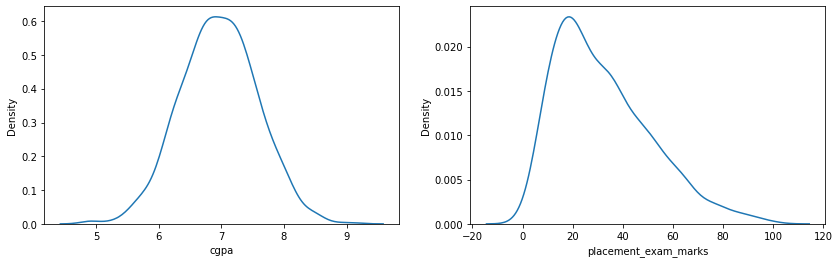

In [6]:
plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)

sns.distplot(df['cgpa'], hist = False)
plt.subplot(1, 2, 2)
sns.distplot(df['placement_exam_marks'], hist = False)
plt.show()

Quite clearly placement exam marks is a skewed data

In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

C:\Users\baibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

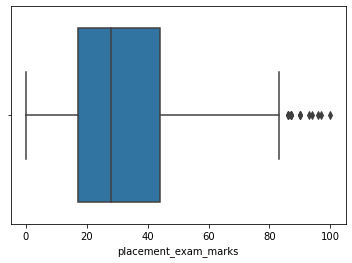

In [8]:
sns.boxplot(df['placement_exam_marks'])

In [9]:
#finding quartiles
p25 = df['placement_exam_marks'].quantile(0.25)
p75 = df['placement_exam_marks'].quantile(0.75)

In [10]:
p75

44.0

In [11]:
iqr = p75 - p25

In [12]:
upper_limit = p75 + 1.5*iqr
lower_limit = p25 - 1.5* iqr

In [13]:
print('Upper Limit', upper_limit)
print('Lower Limit', lower_limit)

Upper Limit 84.5
Lower Limit -23.5


## Finding the Outliers 

In [14]:
df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


## Trimming 

In [15]:
new_df = df[df['placement_exam_marks']< upper_limit]

In [17]:
new_df.describe()

,cgpa,placement_exam_marks,placed
count,985.000000,985.000000,985.00000
mean,6.961594,31.339086,0.48934
std,0.614734,17.857633,0.50014
min,4.890000,0.000000,0.00000
25%,6.550000,17.000000,0.00000
50%,6.960000,28.000000,0.00000
75%,7.370000,43.000000,1.00000
max,9.120000,83.000000,1.00000


C:\Users\baibh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\baibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\baibh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

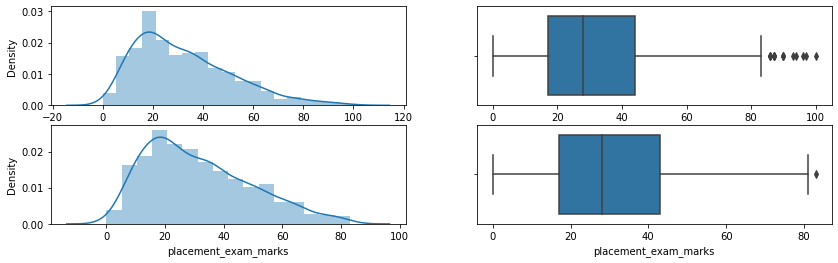

In [19]:
#compare
plt.figure(figsize = (14,4))
plt.subplot(2, 2, 1)

sns.distplot(df['placement_exam_marks'])
plt.subplot(2, 2, 2)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2, 2, 3)
sns.distplot(new_df['placement_exam_marks'])
plt.subplot(2, 2, 4)
sns.boxplot(new_df['placement_exam_marks'])
plt.show()

## Capping 

In [20]:
new_df_cap = df.copy()

In [22]:
new_df_cap['placement_exam_marks'] = np.where(new_df_cap['placement_exam_marks']> upper_limit, upper_limit, np.where(new_df_cap['placement_exam_marks']< lower_limit,lower_limit, new_df_cap['placement_exam_marks']))

C:\Users\baibh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\baibh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\baibh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

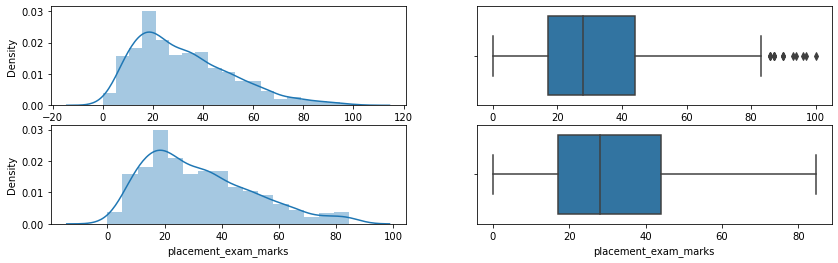

In [24]:
plt.figure(figsize = (14, 4))
plt.subplot (2, 2, 1)
sns.distplot(df['placement_exam_marks'])
plt.subplot(2, 2, 2)
sns.boxplot(df['placement_exam_marks'])
plt.subplot(2, 2, 3)
sns.distplot(new_df_cap['placement_exam_marks'])
plt.subplot(2, 2, 4)
sns.boxplot(new_df_cap['placement_exam_marks'])
plt.show()

thus, all the outliers are removed
